# Machine learning model to predict what kind of music people like

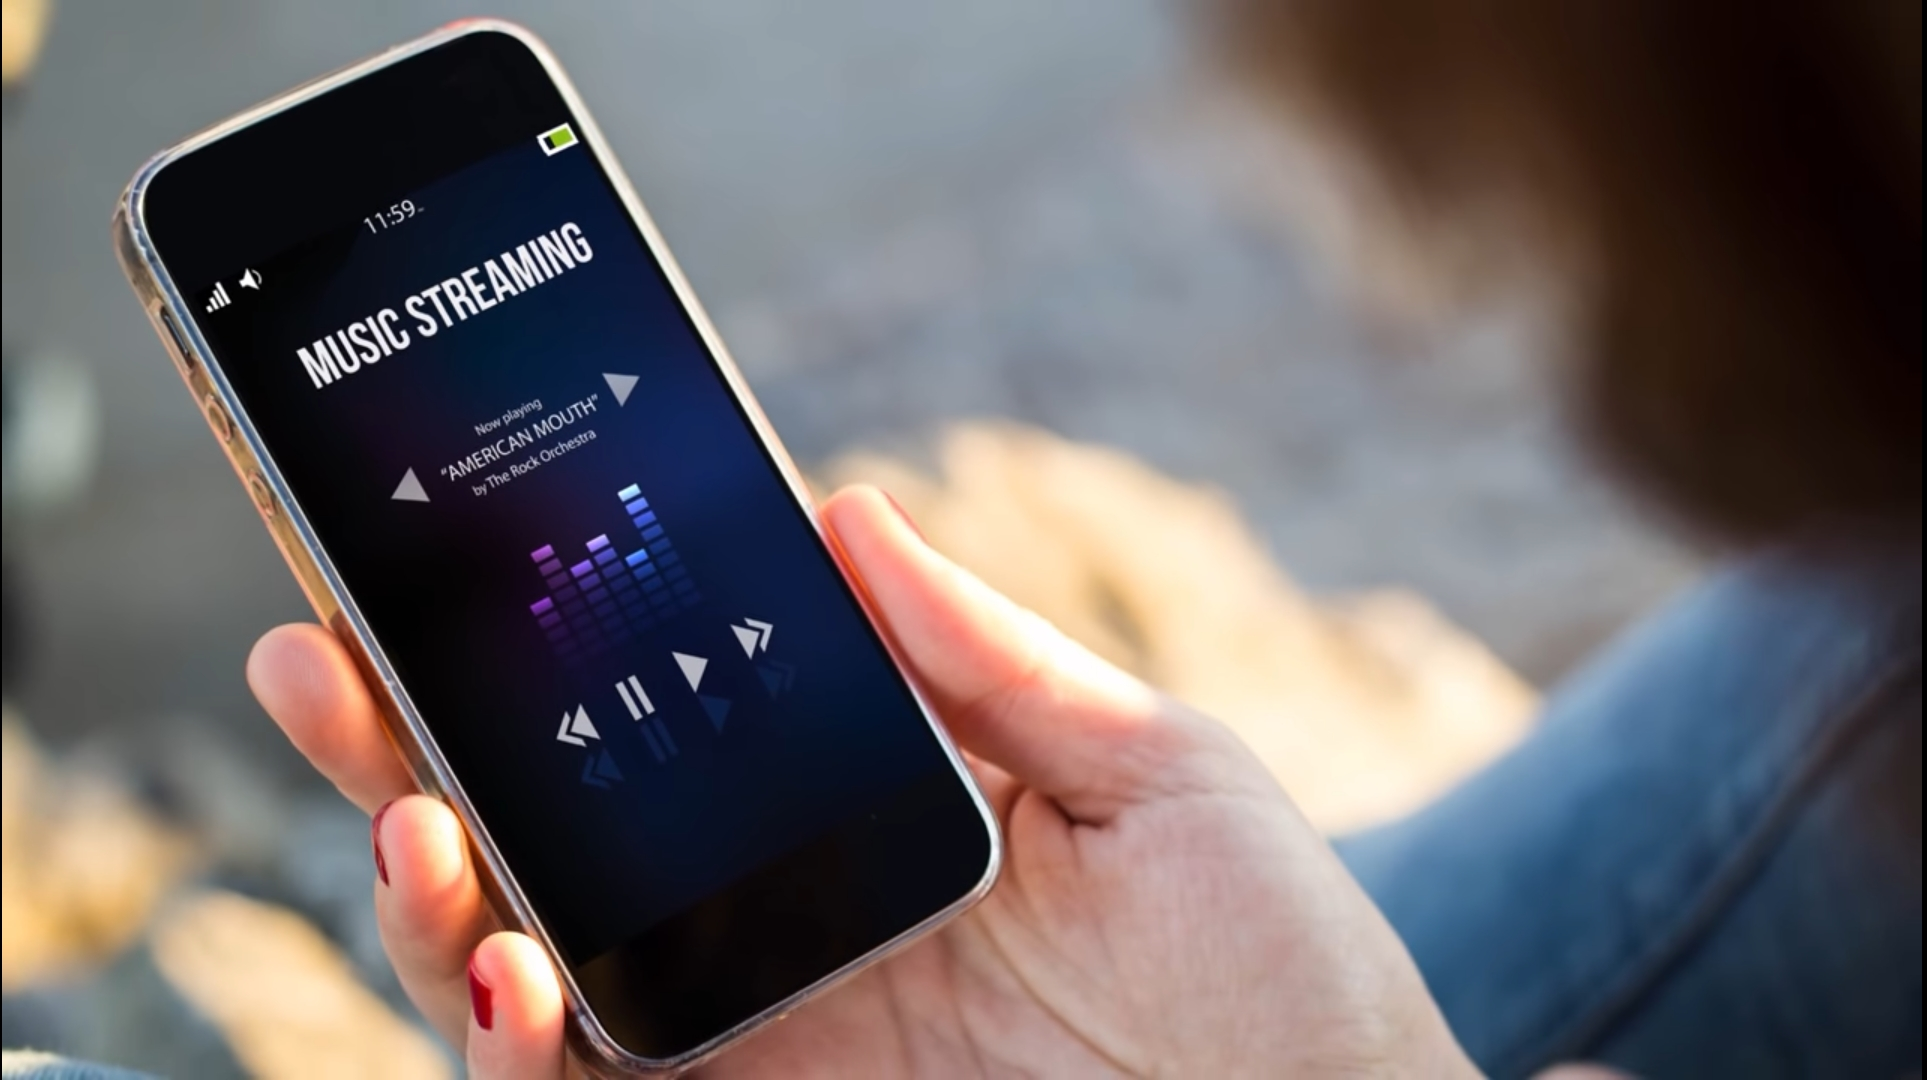

# importing libraries
in this project we will use pnadas for which is data analysis library and it is important because it supports dataframe object, numpy that supports matrix operations and also we will use matplotlib.pyplot and seaborn which is very important for data visualization

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec

# reading the data
in this part we reads the data that we will work on, and will use pandas function to take an overall details about it like know many rows and columns in it.

In [209]:
music_data = pd.read_csv("music.csv")
music_data.shape

(22, 5)

In [210]:
music_data.head()

,user_name,ID,age,gender,genre
0,youssef,#123,20,1,HipHop_Rap_underground_pop
1,mody,#589,23,1,HipHop_Rap_underground_pop
2,tarek,#589,23,1,HipHop_Rap_underground_pop
3,amgad,#963,25,1,HipHop_Rap_underground_pop
4,mark,#741,26,1,Jazz_Classical_pop


In [211]:
music_data

,user_name,ID,age,gender,genre
0,youssef,#123,20,1,HipHop_Rap_underground_pop
1,mody,#589,23,1,HipHop_Rap_underground_pop
2,tarek,#589,23,1,HipHop_Rap_underground_pop
3,amgad,#963,25,1,HipHop_Rap_underground_pop
4,mark,#741,26,1,Jazz_Classical_pop
5,khaled,#852,29,1,Jazz_Classical_pop
6,ahmed,#456,30,1,Jazz_Classical_pop
7,mostafa,#456,30,1,Jazz_Classical_pop
8,ehab,#654,31,1,Classica_loFi_Chill
9,adham,#987,33,1,Classica_loFi_Chill


# checking important details

in this part we will look for some features in our data, like the mean, standard deviation, min and max values, and also we will check if there is any null values in each column.


In [212]:
print(music_data.describe())

             age     gender
count  22.000000  22.000000
mean   27.727273   0.500000
std     4.762770   0.511766
min    20.000000   0.000000
25%    25.000000   0.000000
50%    27.000000   0.500000
75%    30.750000   1.000000
max    37.000000   1.000000


In [213]:
music_data.isnull().sum()

user_name    0
ID           0
age          0
gender       0
genre        0
dtype: int64

# Data visualization

Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.
in this part we will use matplotlib.pyplot and seaborn to visualiz our data, trying to find a relation between attributes.

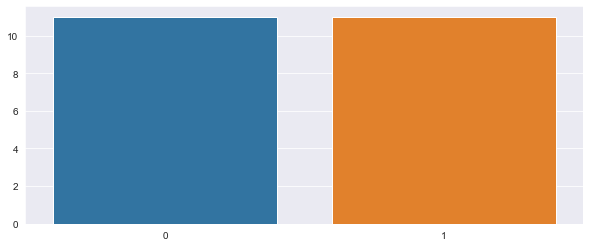

In [214]:
genders = music_data.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

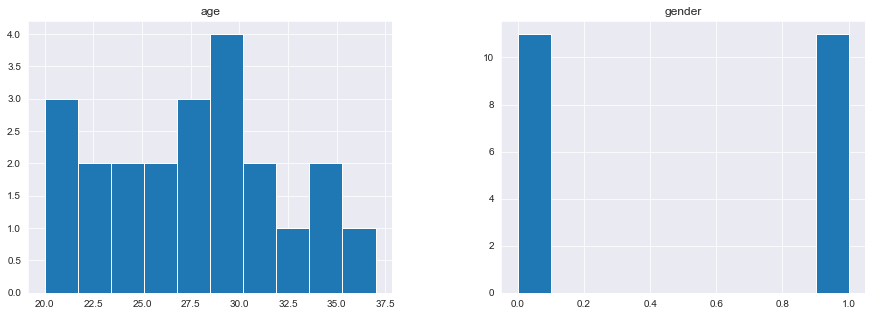

In [215]:
#histograph
music_data.hist(figsize = (15,5))
plt.show()

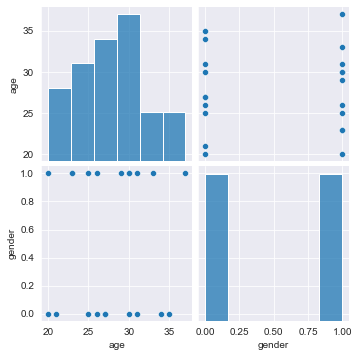

In [216]:
sns.pairplot(music_data)

# Heatmap matrix

A Heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. Heatmaps are perfect for exploring the correlation of features in a dataset.

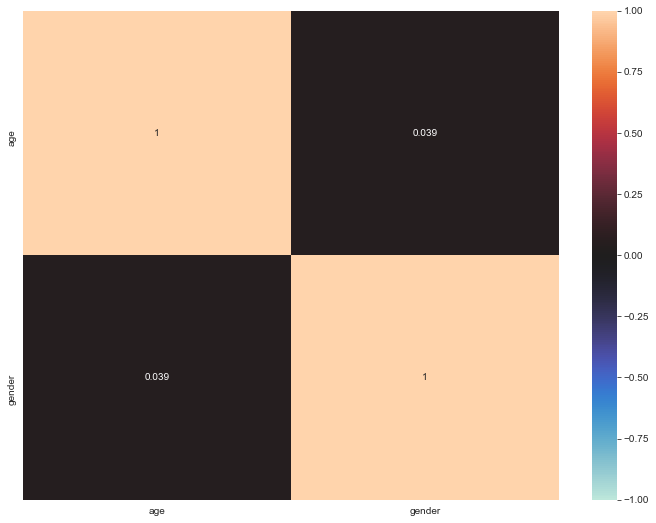

In [217]:
#music_data = pd.DataFrame(columns=['age','gender','genre'])
#corrmat = music_data.corr() 

fig = plt.figure(figsize = (12,9)) 
sns.heatmap(music_data.corr(), annot=True, vmin=-1, vmax=1, center=0)

#sns.heatmap(corrmat, vmax = 10,  annot=True ) #square= True ,
plt.show()

# Data preprocessing

we need to handle the problem in our data like unnecessary columns, null values and duplicated values

In [218]:
music_data.drop( ['user_name', 'ID'] , axis='columns', inplace=True )
music_data

,age,gender,genre
0,20,1,HipHop_Rap_underground_pop
1,23,1,HipHop_Rap_underground_pop
2,23,1,HipHop_Rap_underground_pop
3,25,1,HipHop_Rap_underground_pop
4,26,1,Jazz_Classical_pop
5,29,1,Jazz_Classical_pop
6,30,1,Jazz_Classical_pop
7,30,1,Jazz_Classical_pop
8,31,1,Classica_loFi_Chill
9,33,1,Classica_loFi_Chill


In [219]:
music_data.drop_duplicates( inplace=True )
music_data

,age,gender,genre
0,20,1,HipHop_Rap_underground_pop
1,23,1,HipHop_Rap_underground_pop
3,25,1,HipHop_Rap_underground_pop
4,26,1,Jazz_Classical_pop
5,29,1,Jazz_Classical_pop
6,30,1,Jazz_Classical_pop
8,31,1,Classica_loFi_Chill
9,33,1,Classica_loFi_Chill
10,37,1,Classica_loFi_Chill
11,20,0,Dance_underground_pop


# Spliting data into independent and dependent variables
in this part we will assign the firts two columns ( age, gender) in a variable, we call it independent variable which we will use to make a prediction, and the column (genre) we will assign it in another variable we call it dependent variable which is the prediction we need to get by using the  independent variable.

In [220]:
#independent variable
X = music_data.drop(columns = ['genre'])
X

,age,gender
0,20,1
1,23,1
3,25,1
4,26,1
5,29,1
6,30,1
8,31,1
9,33,1
10,37,1
11,20,0


In [221]:
#dependent variable
y = music_data['genre']
y

0     HipHop_Rap_underground_pop
1     HipHop_Rap_underground_pop
3     HipHop_Rap_underground_pop
4             Jazz_Classical_pop
5             Jazz_Classical_pop
6             Jazz_Classical_pop
8            Classica_loFi_Chill
9            Classica_loFi_Chill
10           Classica_loFi_Chill
11         Dance_underground_pop
12         Dance_underground_pop
13         Dance_underground_pop
14             Acoustic_loFi_pop
15             Acoustic_loFi_pop
18             Acoustic_loFi_pop
19                Classical_loFi
20                Classical_loFi
21                Classical_loFi
Name: genre, dtype: object

# Creating the model
for this problem we will use "DecisionTreeClassifier" algorith to UNmix our data into labled groups, and we will import it by usin sklearn

In [222]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(X, y)

prediction = model.predict([   [21,1],  [22,0]  ]  )
prediction

array(['HipHop_Rap_underground_pop', 'Dance_underground_pop'],
      dtype=object)

# training, testing and measuring the accuracy

in this part we will use "sklearn.model_selection" to import "train_test_split" this will allow us to divide the independent and dependent variables into 80% training sets and 20% testing sets, then we will measure the accuracy by using "sklearn.metrics".

In [223]:
import import_ipynb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#X = music_data.drop(columns = ['genre'])
#y = music_data['genre']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2)
model.fit(X_train, y_train)


prediction = model.predict(X_test)

score = accuracy_score(y_test , prediction )
score

1.0

# Saving the model

we do not want in each time the model runs to train itself with a new data intered to it by a user, we just need it to save what it leaned in file then we need to load this file in each time the model runs, we will do it by usin "joblib"

In [224]:
import joblib
from joblib import dump, load

model.fit(X_train, y_train)
joblib.dump(model, 'music_recommender.joblib')
model = joblib.load('music_recommender.joblib')

prediction = model.predict(X_test)

prediction

array(['Classical_loFi', 'Acoustic_loFi_pop', 'Jazz_Classical_pop',
       'Dance_underground_pop'], dtype=object)

# visualizing the DecisionTreeClassifier algorith

In [225]:
from sklearn import tree

dot_data = tree.export_graphviz(model, out_file='music_recommender.dot',
                    feature_names = ['age', 'gender'],
                    class_names = sorted(y.unique()),
                    label = 'all',
                    rounded = True,
                    filled = True)


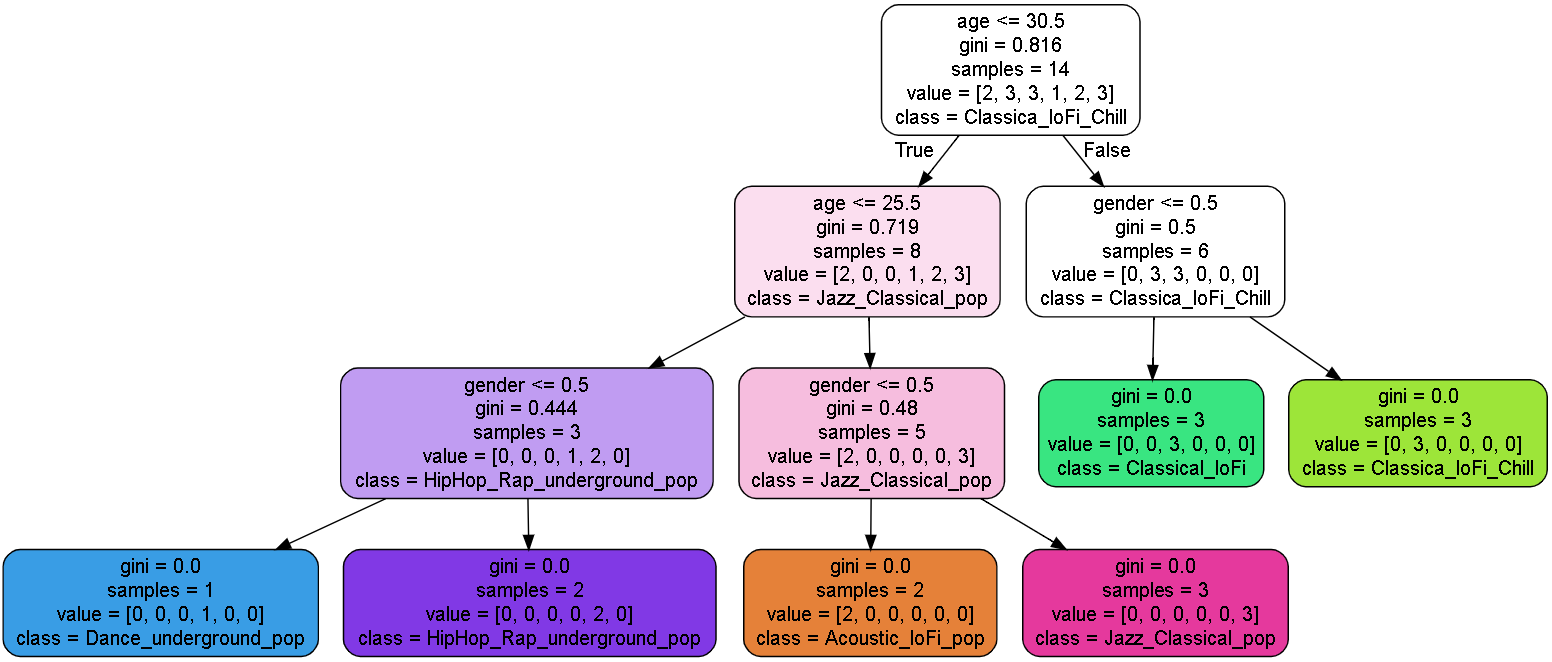